<a href="https://colab.research.google.com/github/Lezhenkov/Lab1/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import scipy.stats
from scipy.optimize import least_squares

## 1)предобработка

In [43]:
cont_dist_of_rv = pd.read_excel('/content/drive/MyDrive/МОМО/Лаба_1/Nepreryvnye_raspredelenia (1).xlsx')
df = pd.read_csv('/content/drive/MyDrive/МОМО/Лаба_1/diabetes.csv')
df = df.rename(columns={'DiabetesPedigreeFunction':'dp_func'})
df = df[(df.Glucose > 10) & (df.BloodPressure >20) & (df.Insulin>0) & (df.Insulin <500) & (df.BMI>0) & (df.dp_func<2)] 
df.head()

,Unnamed: 0,Glucose,BloodPressure,Insulin,BMI,dp_func,Outcome
3,3,89,66,94,28.1,0.167,0
6,6,78,50,88,31.0,0.248,1
14,14,166,72,175,25.8,0.587,1
16,16,118,84,230,45.8,0.551,1
18,18,103,30,83,43.3,0.183,0


In [44]:
print(df.shape)
print(df.dtypes)

(380, 7)
Unnamed: 0         int64
Glucose            int64
BloodPressure      int64
Insulin            int64
BMI              float64
dp_func          float64
Outcome            int64
dtype: object


## Оценка порядковой статистики

In [45]:
target_cols = ['Glucose', 'BloodPressure', 'Insulin', 'BMI','dp_func' ] #столбцы с непрерывными СВ
df[target_cols].describe() 

,Glucose,BloodPressure,Insulin,BMI,dp_func
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,121.171053,70.636842,144.578947,32.861842,0.506334
std,29.966379,12.432603,93.460680,6.853052,0.297694
min,56.000000,24.000000,15.000000,18.200000,0.085000
25%,99.000000,62.000000,76.000000,28.075000,0.269750
50%,118.000000,70.000000,122.000000,33.100000,0.446500
75%,140.250000,78.000000,183.250000,36.825000,0.678000
max,198.000000,110.000000,495.000000,67.100000,1.699000


## 3)Построение непараметрической оценки PDF в виде гистограммы и использование функции плотности ядра


подбор кол-ва бинов

In [46]:
n = round(5*np.log10(len(df['Glucose'])))
n

13

Гистограммы и ядерные оценки плотности 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

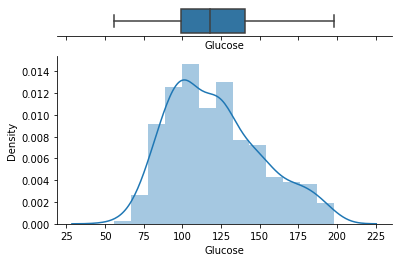

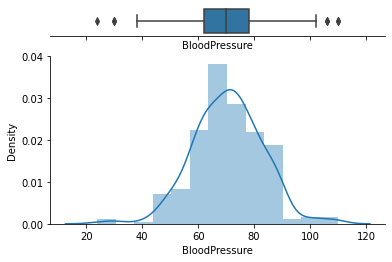

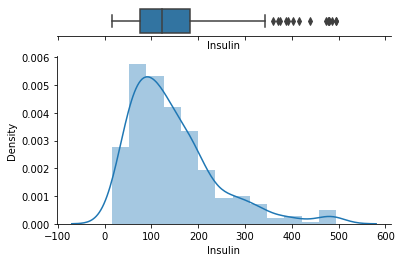

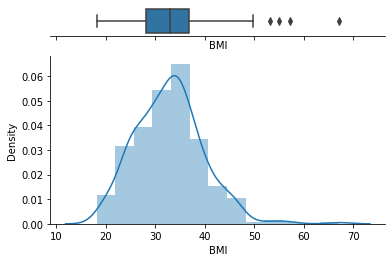

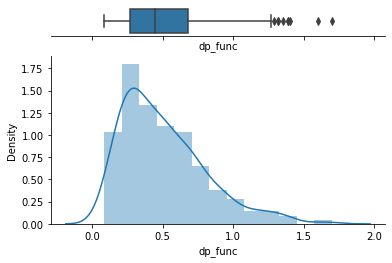

In [47]:
for col in target_cols:
  x = df[col]
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      gridspec_kw={"height_ratios": (.15, .85)})

  sns.boxplot(x, ax=ax_box)
  sns.distplot(x,bins=n, ax=ax_hist)

  ax_box.set(yticks=[])
  sns.despine(ax=ax_hist)
  sns.despine(ax=ax_box, left=True)

Функция pvalue теста Колмогорова-Смирнова

In [48]:
def KS(column, dist, data):

  attr = getattr(scipy.stats._continuous_distns, dist)

  values = plt.hist(data[column],density=True, label='Распределение колонки')
  x_axis = np.linspace(np.min(data[column]), np.max(data[column]))

  params = attr.fit(data[column])
  ks = scipy.stats.kstest(data[column], dist, params, N=100)
  pdf = attr.pdf(x_axis, *params)

  return(ks.pvalue)

In [49]:
def best_cont_dist(column,data,dist_set):  

  p_value = []
  for item in dist_set['Название']:

    try:
      p_value.append(KS(column, item, data))
    except:
      p_value.append(np.nan)
      continue

  dist_set['Pvalue'] = p_value
  dist_set = dist_set[dist_set['Pvalue'] == max(p_value)]
  dist_set.reset_index(drop=True,inplace=True)
  best_dist = {'Название' : dist_set['Название'][0],
              'pvalue' : dist_set['Pvalue'][0]}
  return(best_dist)

ввод params

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:801: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:805: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 13.65.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 12.35.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape paramete

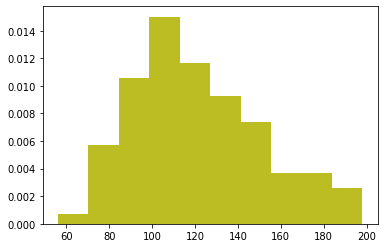

In [50]:
params1 = best_cont_dist('Glucose', df, cont_dist_of_rv)


/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1256.8500000000001.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1137.1499999999999.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has bee

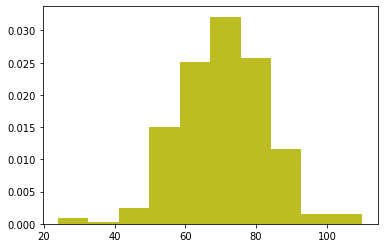

In [51]:
params2 = best_cont_dist('BloodPressure', df, cont_dist_of_rv)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.05.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0333333333333332.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0555555555555554.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.083333333333333.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been give

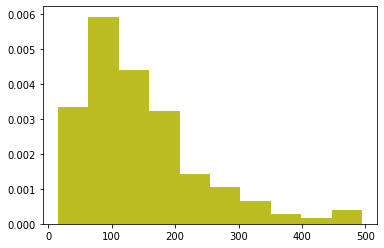

In [52]:
params3 = best_cont_dist('Insulin', df, cont_dist_of_rv)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 11.55.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.45.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.633333333333336.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 10.725000000000001.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-int

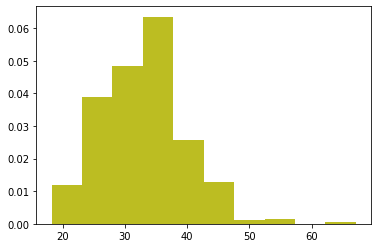

In [53]:
params4 = best_cont_dist('BMI', df, cont_dist_of_rv)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1500000000000004.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1000000000000005.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.916666666666667.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.091666666666667.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2807: RuntimeWarning: The shape parameter of the erlang distribution 

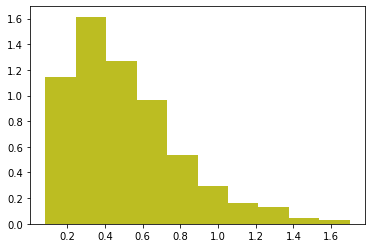

In [54]:
params5 = best_cont_dist('dp_func', df, cont_dist_of_rv)

вывод значений params

In [55]:
params1 

{'Название': 'kstwobign', 'pvalue': 0.730328883356722}

In [56]:
params2

{'Название': 'fatiguelife', 'pvalue': 0.42815688616598546}

In [57]:
params3

{'Название': 'exponweib', 'pvalue': 0.998079702028827}

In [58]:
params4

{'Название': 't', 'pvalue': 0.8138177618839737}

In [59]:
params5

{'Название': 'johnsonsb', 'pvalue': 0.9939628994283952}

Функция получения параметров распределения

In [60]:
def dist_params(column, params, df):
  dist = params['Название']
  attr = getattr(scipy.stats._continuous_distns, dist)

  x_axis = np.linspace(np.min(df[column]), np.max(df[column]))

  params_1 = attr.fit(df[column])
  pdf1 = attr.pdf(x_axis, *params_1)

  return(params_1)

In [61]:
def dist_plot(column, params, data, params_ML, params_MNK):
  dist = params['Название']
  attr = getattr(scipy.stats._continuous_distns, dist)


  plt.figure(figsize=(10, 5))
  values = plt.hist(data[column],density=True, label='Распределение колонки', bins = n)
  x_axis = np.linspace(np.min(data[column]), np.max(data[column]))

  params_1 = params_ML
  pdf1 = attr.pdf(x_axis, *params_1)

  params_2 = params_MNK
  pdf2 = attr.pdf(x_axis, *params_2)

  plt.title(str(column))
  plt.plot(x_axis, pdf1, label='Эмпирическое распределение для МП')
  plt.plot(x_axis, pdf2, label='Эмпирическое распределение для МНК')
  plt.legend()
  plt.show()

#Glucose

In [62]:
gl = dist_params('Glucose', params1, df)
gl

(17.63658689469294, 118.9888207707657)

In [63]:
x0 = np.array(gl)
list_quan = np.arange(0,1,0.05)
xdata = np.quantile(df['Glucose'], list_quan)[1:]

def datax(x):
  return xdata
def LS(a,b):
  return scipy.stats.kstwobign.ppf(list_quan,a,b)[1:]
def func1(x):
  return (LS(x[0], x[1]) - datax(x[0]))
res_gl = least_squares(func1, x0)
res_gl.x

array([ 16.84649159, 120.64457544])

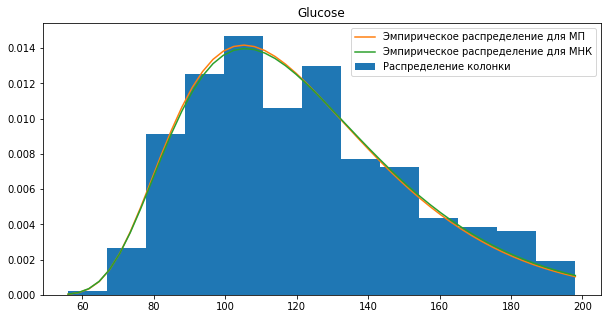

In [64]:
dist_plot('Glucose', params1,df, gl, res_gl.x)

#BloodPressure

In [65]:
BP = dist_params('BloodPressure', params2, df)
BP

(0.010510152072814152, -1111.617557667535, 1182.2001546112315)

In [66]:
x0 = np.array(BP)
def LS(x):
  list_quan = np.arange(0,1,0.05)

  xdata = np.quantile(df['BloodPressure'], list_quan)[1:]

  diff = abs((scipy.stats.fatiguelife.ppf(list_quan, x[0], x[1], x[2])[1:]) - xdata).sum()
  return diff
  
res_BP = least_squares(LS, x0)
res_BP.x

array([ 1.01051255e-02, -1.11161756e+03,  1.18220015e+03])

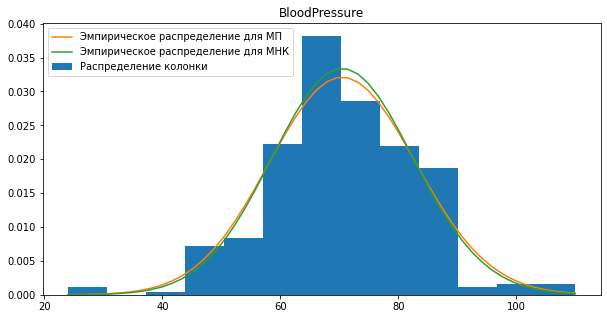

In [67]:
dist_plot('BloodPressure', params2, df, BP, res_BP.x)

#Insulin

In [68]:
ins = dist_params('Insulin', params3, df)
ins

(3.8088405329682655, 0.8704377244811785, 5.180502915981473, 59.83866385440852)

In [69]:
x0 = np.array(ins)
def LS(x):
  list_quan = np.arange(0,1,0.05)

  xdata = np.quantile(df['Insulin'], list_quan)[1:]

  diff = abs((scipy.stats.exponweib.ppf(list_quan, x[0], x[1], x[2], x[3])[1:]) - xdata).sum()
  return diff
  
res_ins = least_squares(LS, x0)
res_ins.x

array([ 3.80884009,  0.87043146,  5.18050289, 59.83866385])

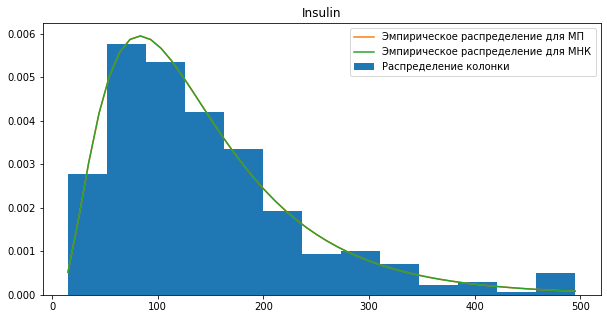

In [70]:
dist_plot('Insulin', params3,df, ins, res_ins.x)

#BMI

In [71]:
bm = dist_params('BMI', params4, df)
bm

(13.439396518961924, 32.729428079378366, 6.338326856461146)

In [72]:
x0 = np.array(bm)
list_quan = np.arange(0,1,0.05)
xdata = np.quantile(df['BMI'], list_quan)[1:]

def datax(x):
  return xdata

def LS(a,b,c):
  return scipy.stats.t.ppf(list_quan,a,b,c)[1:]

def func1(x):
  return (LS(x[0], x[1], x[2]) - datax(x[0]))
res_bm = least_squares(func1, x0)
res_bm.x

array([15.39030747, 32.67157895,  6.40211777])

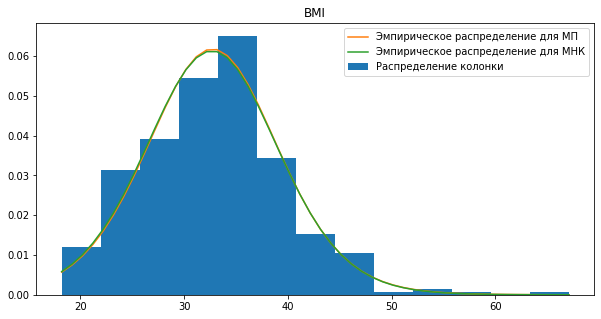

In [73]:
dist_plot('BMI', params4,df, bm, res_bm.x)

# dp_func

In [74]:
dp = dist_params('dp_func', params5, df)
dp

(1.557431873888775, 1.074254641722253, 0.05257559958877388, 2.0205061869019243)

In [75]:
x0 = np.array(dp)
def LS(x):
  list_quan = np.arange(0,1,0.05)

  xdata = np.quantile(df['dp_func'], list_quan)[1:]

  diff = abs((scipy.stats.johnsonsb.ppf(list_quan, x[0], x[1], x[2], x[3])[1:]) - xdata).sum()
  return diff
  
res_dp = least_squares(LS, x0)
res_dp.x

array([1.55959315, 1.08863146, 0.0523069 , 2.0133834 ])

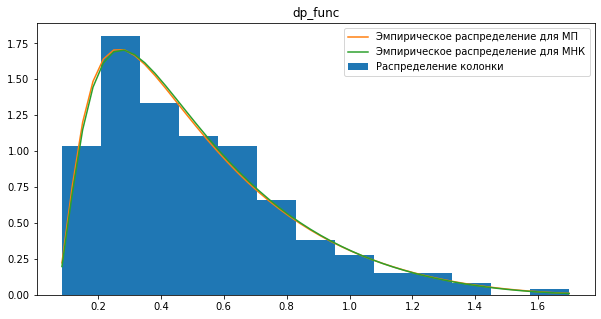

In [76]:
dist_plot('dp_func', params5,df, dp, res_dp.x)

# Квантильные биплоты Q-Q plots

In [77]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
def q_q_biplot(column ,params, df,params_ML, params_MNK):
  distr = params['Название']
  attr = getattr(scipy.stats._continuous_distns, distr)
  # Calculation of quantiles
  percs = np.linspace(0, 100, 21)
  qn_first = np.percentile(df[column], percs)
  params_ML = params_ML
  qn_distr__ML  = attr.ppf(percs / 100.0, *params_ML)

  params_MNK = params_MNK
  qn_distr__MNK  = attr.ppf(percs / 100.0, *params_MNK)

  # Building a quantile biplot
  x = np.linspace(np.min(df[column]), np.max(df[column]))
  plt.figure(figsize=(10, 10))
  plt.plot(qn_first, qn_distr__ML, ls="", marker="o", markersize=6, label = 'ML')
  plt.plot(qn_first, qn_distr__MNK, ls="", marker="o", markersize=6, label = 'LSM')
  plt.plot(x, x, color="k", ls="--")

  plt.xlabel(f'Empirical distribution')
  plt.ylabel('Theoretical '+ str(distr) +' distribution')
  plt.title('Биплот столбца ' + str(column))
  plt.legend()
  plt.show()

In [78]:
def q_q_biplot_BP(column ,params, df,params_ML, params_MNK):
  distr = params['Название']
  attr = getattr(scipy.stats._continuous_distns, distr)
  # Calculation of quantiles
  percs = np.linspace(5, 100, 21)
  qn_first = np.percentile(df[column], percs)
  params_ML = params_ML
  qn_distr__ML  = attr.ppf(percs / 100.0, *params_ML)

  params_MNK = params_MNK
  qn_distr__MNK  = attr.ppf(percs / 100.0, *params_MNK)

  # Building a quantile biplot
  x = np.linspace(np.min(df[column]), np.max(df[column]))
  plt.figure(figsize=(10, 10))
  plt.plot(qn_first, qn_distr__ML, ls="", marker="o", markersize=6, label = 'ML')
  plt.plot(qn_first, qn_distr__MNK, ls="", marker="o", markersize=6, label = 'LSM')
  plt.plot(x, x, color="k", ls="--")

  plt.xlabel(f'Empirical distribution')
  plt.ylabel('Theoretical '+ str(distr) +' distribution')
  plt.title('Биплот столбца ' + str(column))
  plt.legend()
  plt.show()

Glucose

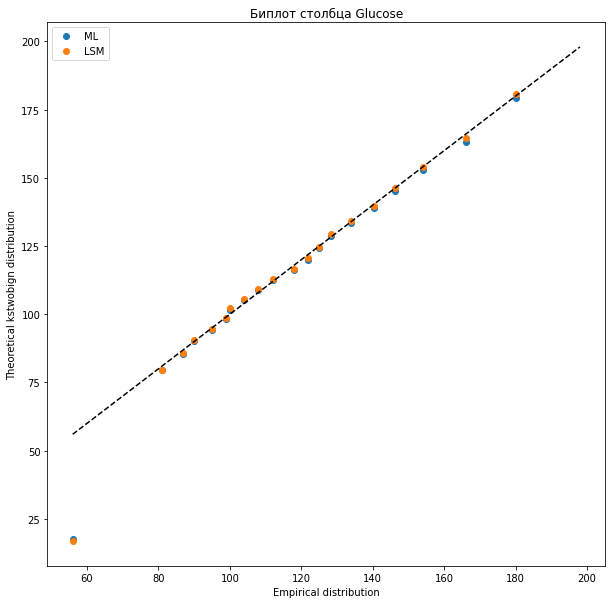

In [79]:
q_q_biplot('Glucose', params1,df, gl, res_gl.x)

Bloodpressure

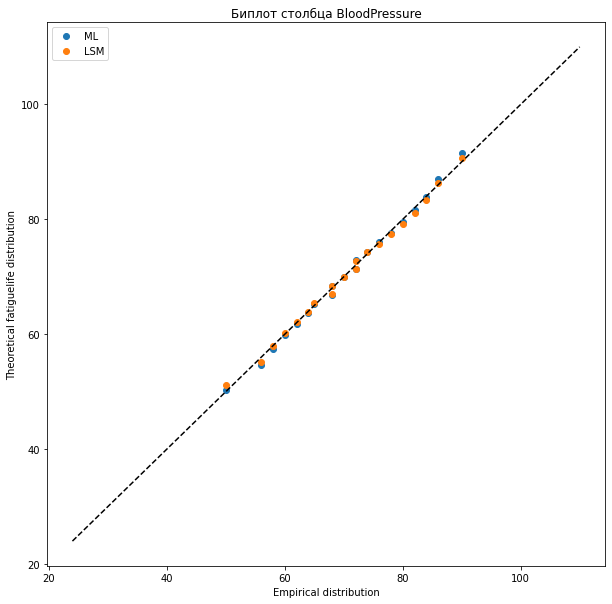

In [80]:
q_q_biplot_BP('BloodPressure', params2,df, BP, res_BP.x)

Insulin

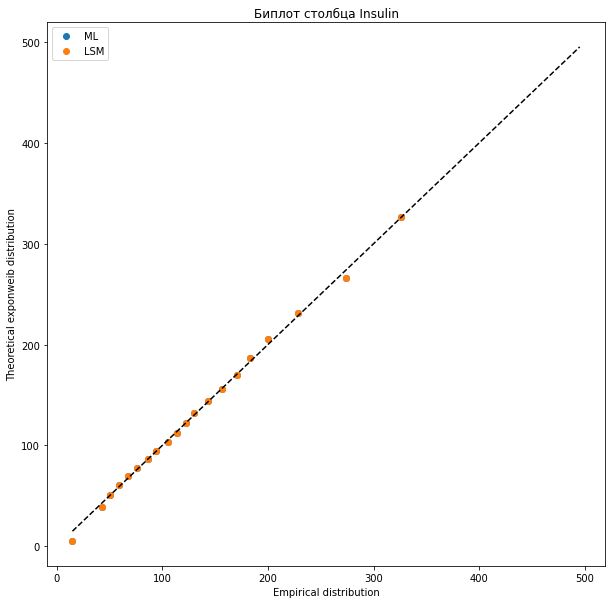

In [81]:
q_q_biplot('Insulin', params3,df, ins, res_ins.x)

BMI

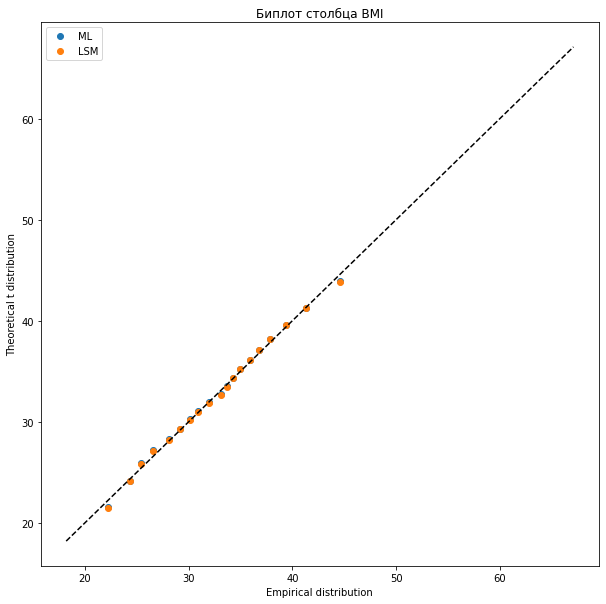

In [82]:
q_q_biplot('BMI', params4,df, bm, res_bm.x)

dp_func

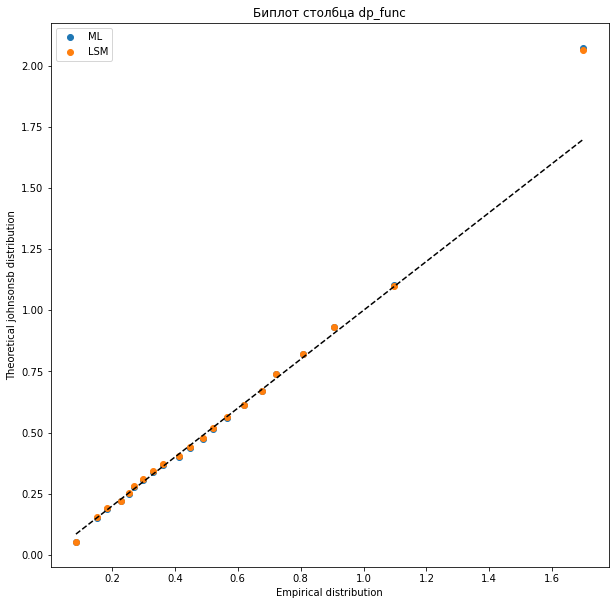

In [83]:
q_q_biplot('dp_func', params5,df, dp, res_dp.x)

# Критерий Крамера-Мизеса-Смирнова

In [84]:
def KMC(data, col, dist, params):
  x = df[col].values
  res = stats.cramervonmises(x, dist, params)
  return res

In [85]:
KMC(df, 'Glucose', 'kstwobign', gl)

CramerVonMisesResult(statistic=0.0683469306963723, pvalue=0.7620446745460647)

In [86]:
KMC(df, 'BloodPressure', 'fatiguelife', BP)

CramerVonMisesResult(statistic=0.11496547039598237, pvalue=0.5165781235734925)

In [87]:
KMC(df, 'Insulin', 'exponweib', ins)

CramerVonMisesResult(statistic=0.02125215216993266, pvalue=0.9957192688654251)

In [88]:
KMC(df, 'BMI', 't', bm)

CramerVonMisesResult(statistic=0.061986205886553576, pvalue=0.8017721154120585)

In [89]:
KMC(df, 'dp_func', 'johnsonsb', dp)

CramerVonMisesResult(statistic=0.03797478532006174, pvalue=0.9435138426969367)

## Сэмплирование


# Сэмплирование с помощью обратной функции

In [90]:
def sampl(data, column, distibution, params, mbins):

  x_axis = np.linspace(min(data[column]),max(data[column]))
  attr = getattr(scipy.stats._continuous_distns, distibution)

  y = attr.ppf(np.random.random_sample(1000), *params)
  plt.figure(figsize=(20,10))
  plt.xlim(min(data[column]), max(data[column]))
  plt.plot(x_axis, attr.pdf(x_axis, *params), label = ('Плотность эмпирического распределения '+ str(distibution)))
  plt.hist(data[column],density=True, label='Распределение колонки',bins = mbins)
  plt.hist(y,density=True, label='Распределение Сэмпла', bins = mbins, alpha=0.75)
  plt.legend()
  plt.title('Cэмплирование обратной функцией колонки ' + str(column))
  q_q_biplot(data, column, y,distibution)

# Сэмплирование с помощью  SimpleRatioUniforms

In [91]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
def q_q_biplot(df, column, sample,distibution):

  # Calculation of quantiles
  percs = np.linspace(0, 100, 100)
  qn_data = np.percentile(df[column], percs)
  qn_sample  = np.percentile(sample, percs)

  # Building a quantile biplot
  x = np.linspace(np.min(df[column]), np.max(df[column]))
  plt.figure(figsize=(10, 10))
  plt.plot(qn_data, qn_sample, ls="", marker="o", markersize=6, label = distibution)
  plt.plot(x, x, color="k", ls="--")

  plt.xlabel(f'Распределение СВ')
  plt.ylabel('Распределение сэмпла')
  plt.title('Биплот для колонки ' + str(column))
  plt.legend()
  plt.show()

In [92]:
def rejection_sampl(data, column, distibution, params, nbins):

  attr = getattr(scipy.stats._continuous_distns, distibution)
  x_axis = np.linspace(min(data[column]),max(data[column]))
  def _f(x):
    return(attr.pdf(x, *params))

  (a,b) = (min(data[column]),max(data[column]))

  def _g(x):
    return scipy.stats.uniform.pdf(x, loc=a, scale=b-a)

  M = 1.01*np.max(_f(x_axis)/_g(x_axis))

  X = []
  n = 10000
  for i in range(n):
    x = np.random.uniform(a,b)
    if _f(x)/(M*_g(x)) > np.random.uniform(0,1):
      X.append(x)
  plt.figure(figsize=(20,10))

  plt.plot(x_axis, _f(x_axis), label = ('Плотность эмпирического распределения '+ str(distibution)))
  plt.plot(x_axis, M*_g(x_axis), label = 'Плотность равномерного распределения')
  plt.hist(data[column], density=True, bins = nbins, label = 'Распределение СВ')
  plt.hist(X, density=True, alpha = 0.75, bins = nbins, label = 'Распределение сэмпла')
  plt.legend()
  plt.title('Cэмплирование столбца ' + str(column) + ' методом ratio uniform')
  q_q_biplot(data, column, X,distibution)

# Графики сэмплов

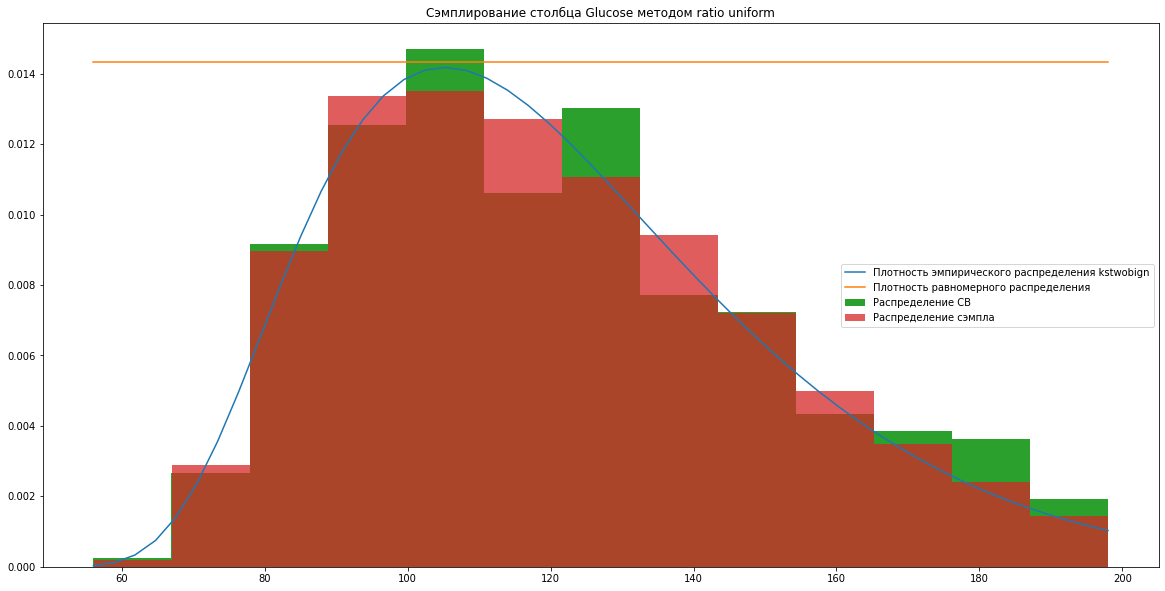

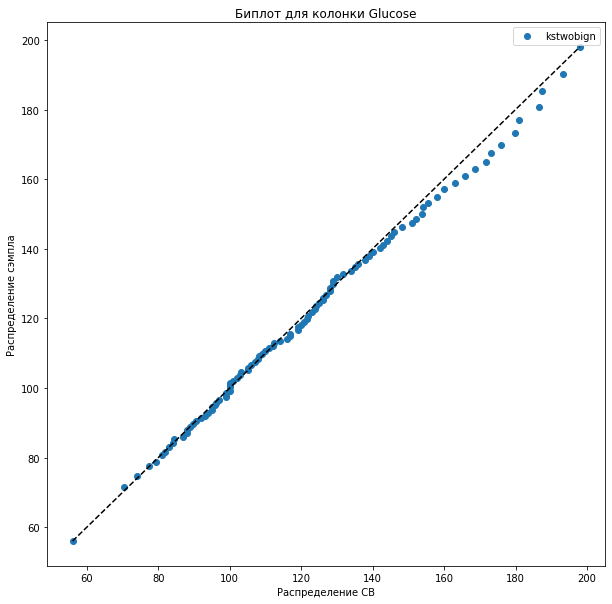

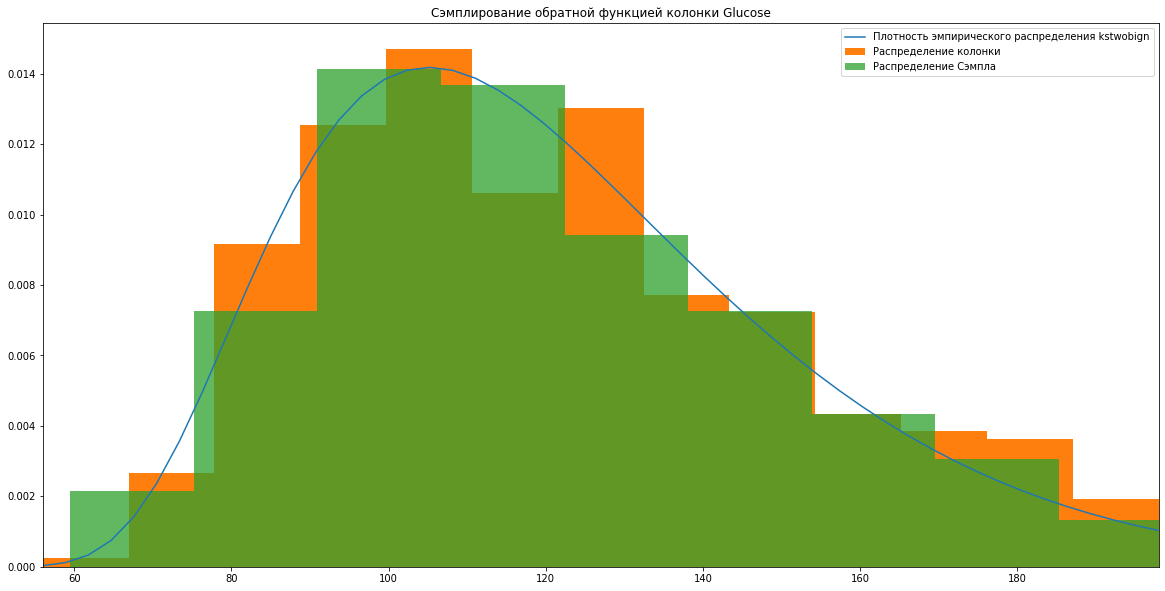

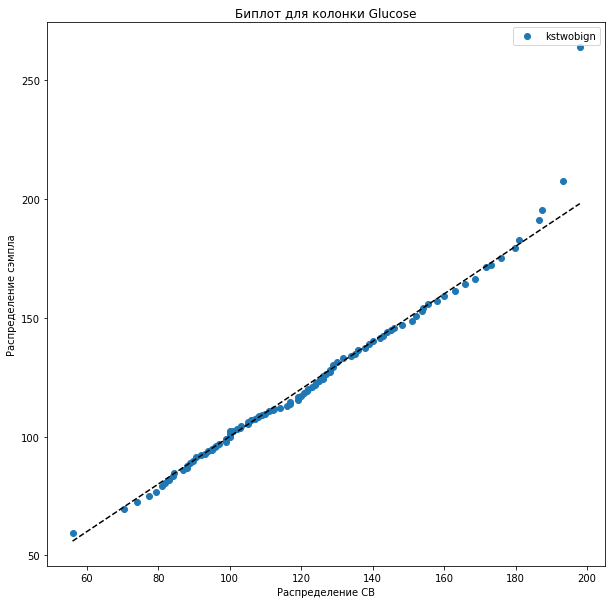

In [93]:
rejection_sampl(df, 'Glucose', 'kstwobign', gl, 13)
sampl(df, 'Glucose', 'kstwobign', gl, 13)

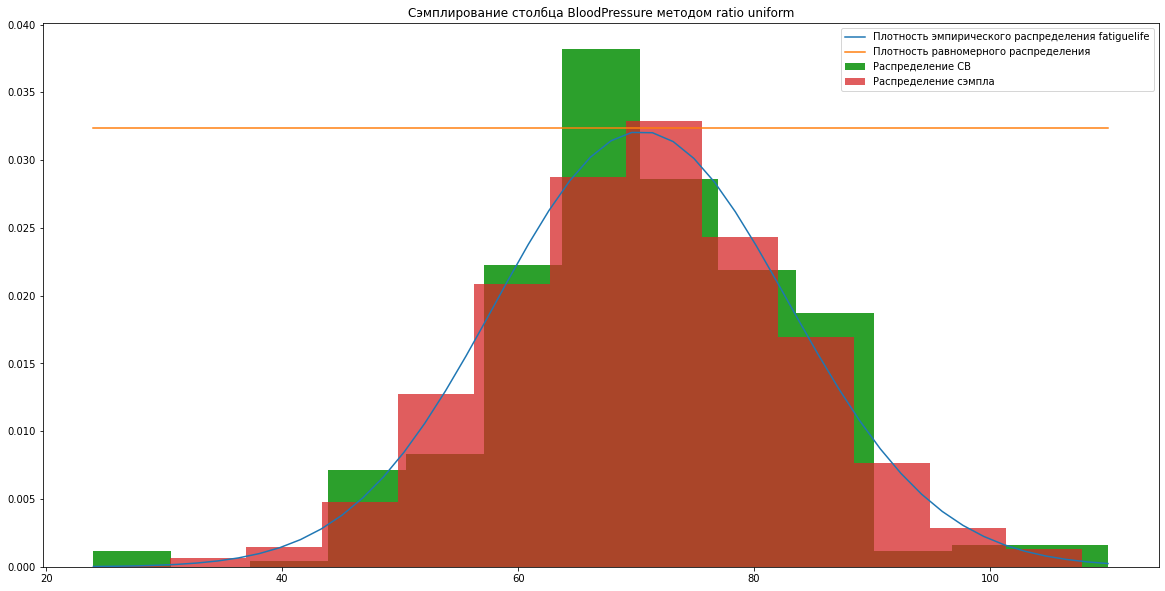

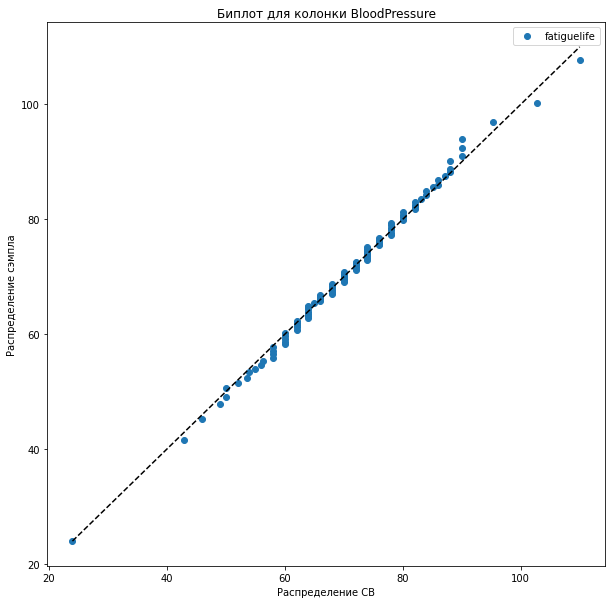

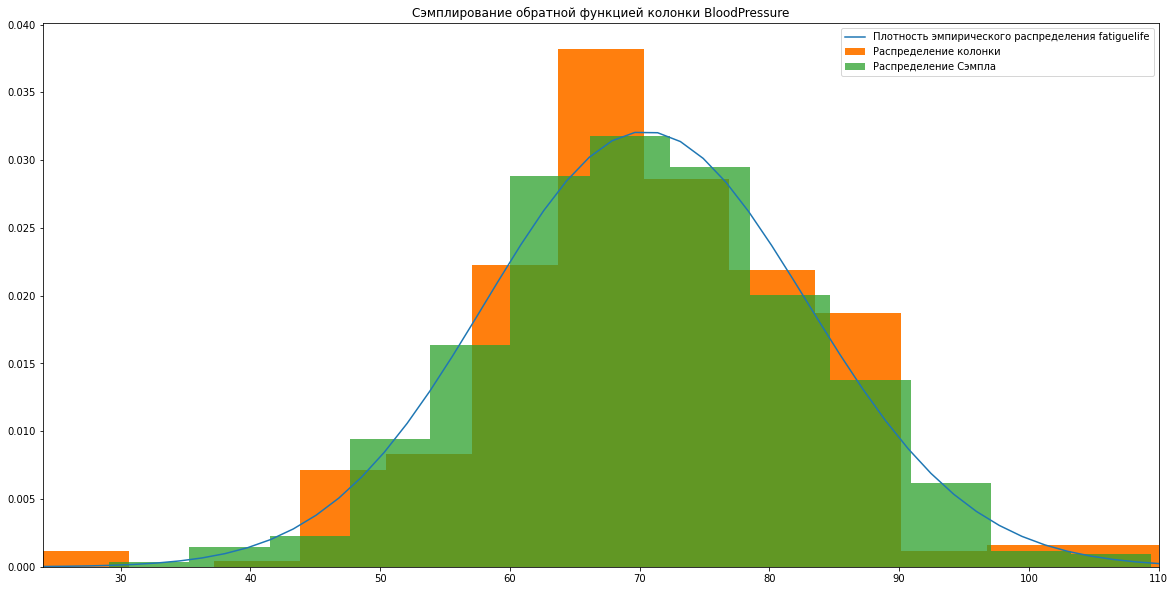

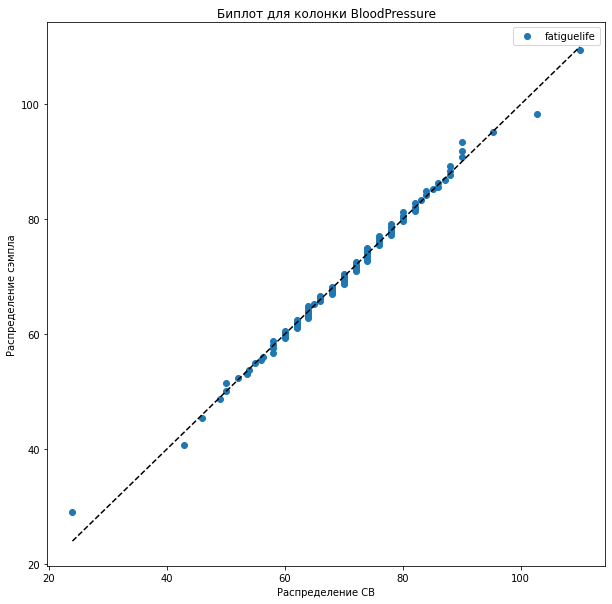

In [94]:
rejection_sampl(df, 'BloodPressure', 'fatiguelife', BP, 13)
sampl(df, 'BloodPressure', 'fatiguelife', BP, 13)

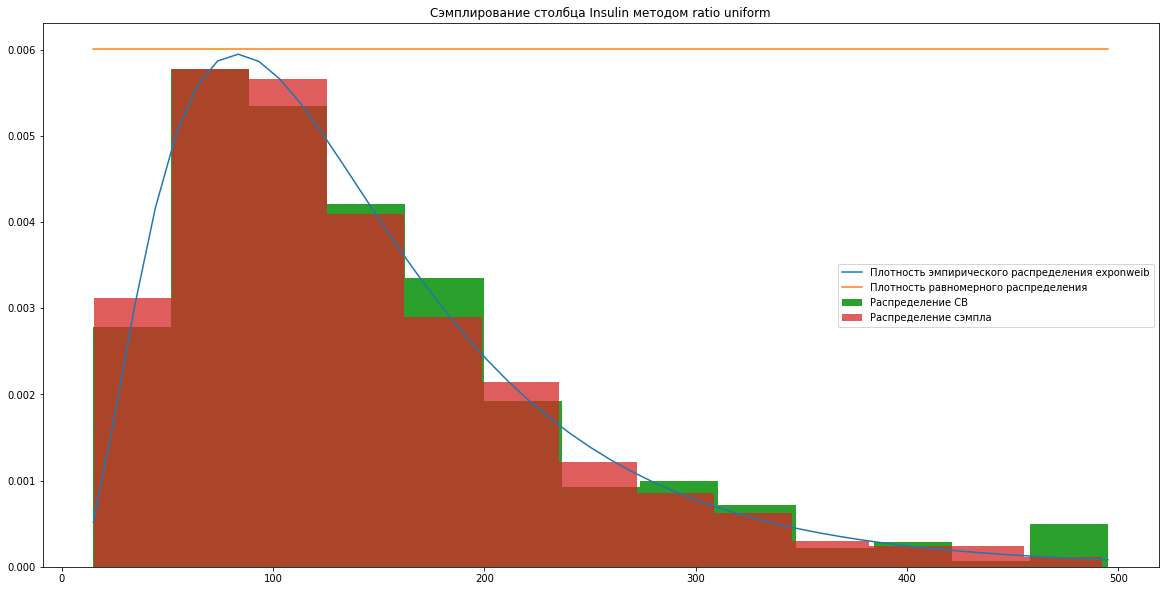

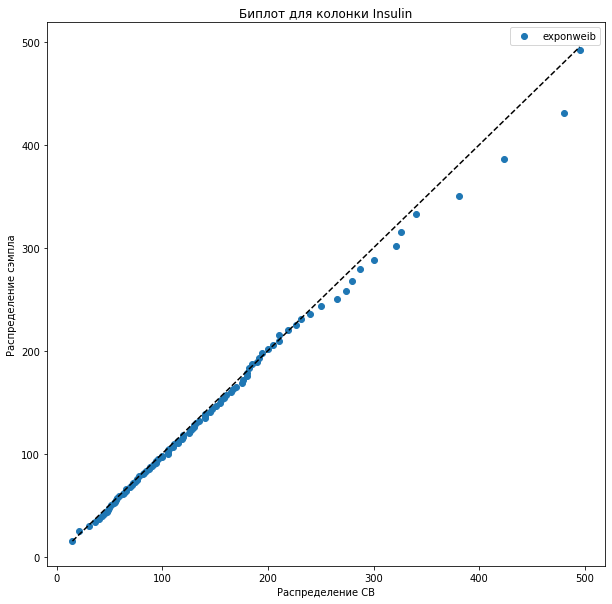

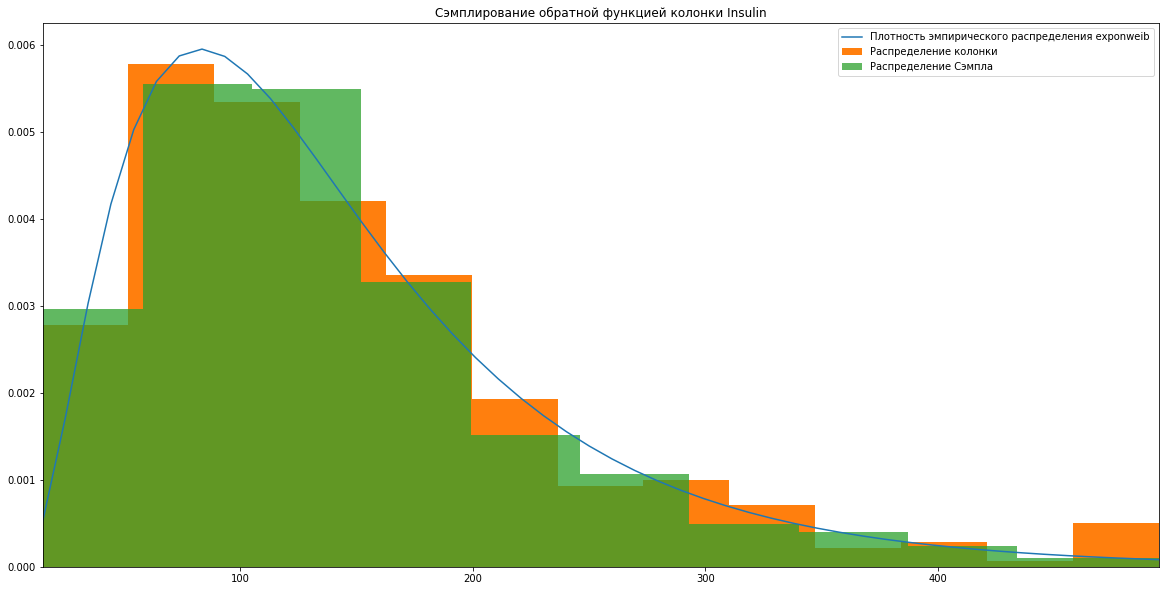

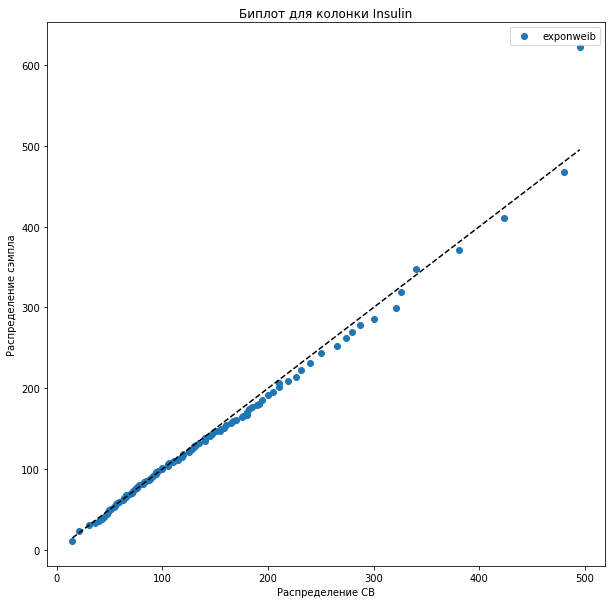

In [95]:
rejection_sampl(df, 'Insulin', 'exponweib', ins, 13)
sampl(df, 'Insulin', 'exponweib', ins, 13)

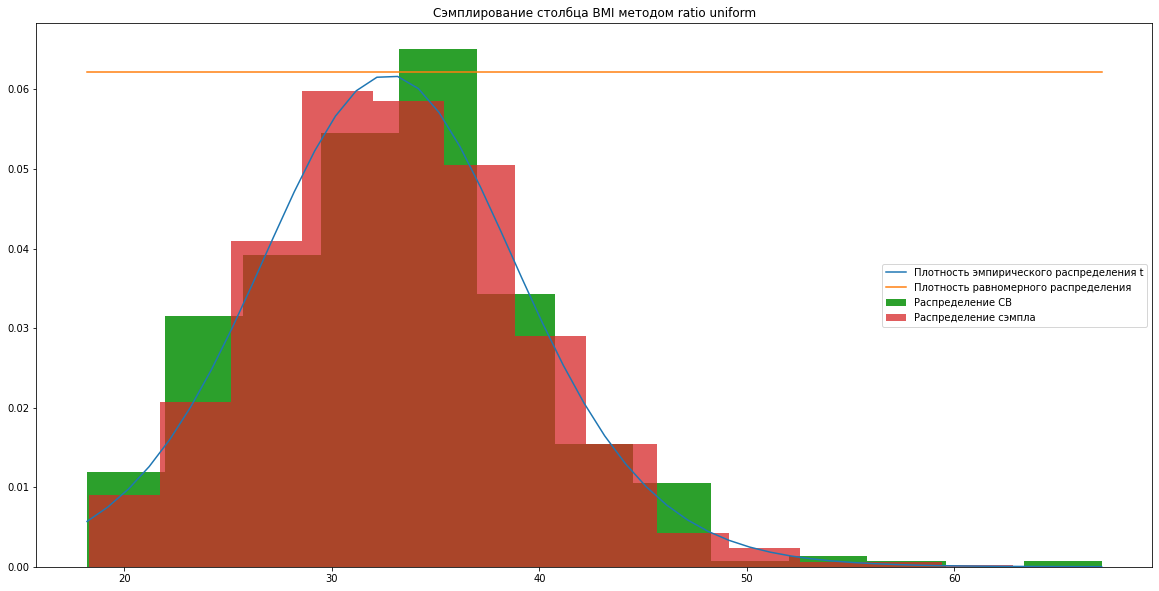

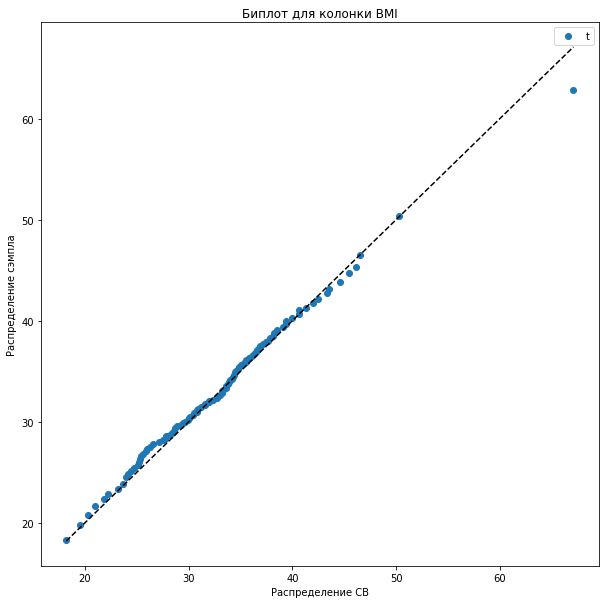

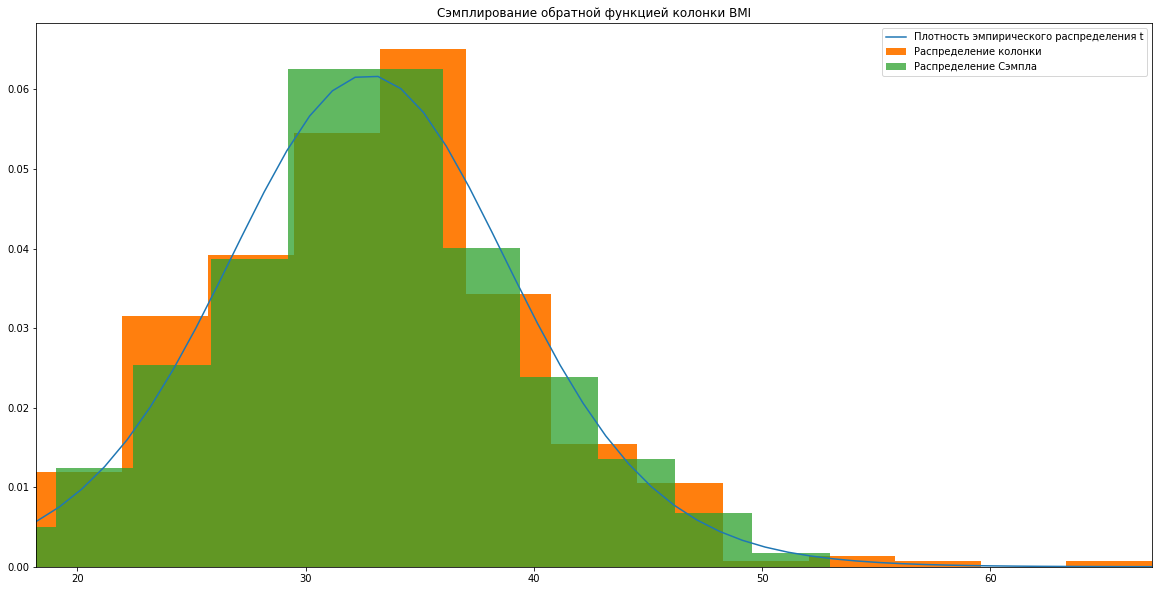

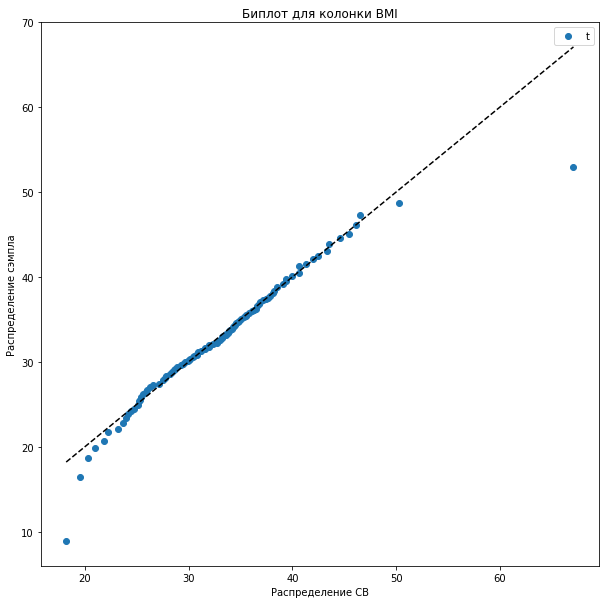

In [96]:
rejection_sampl(df, 'BMI', 't', bm, 13)
sampl(df, 'BMI', 't', bm, 13)

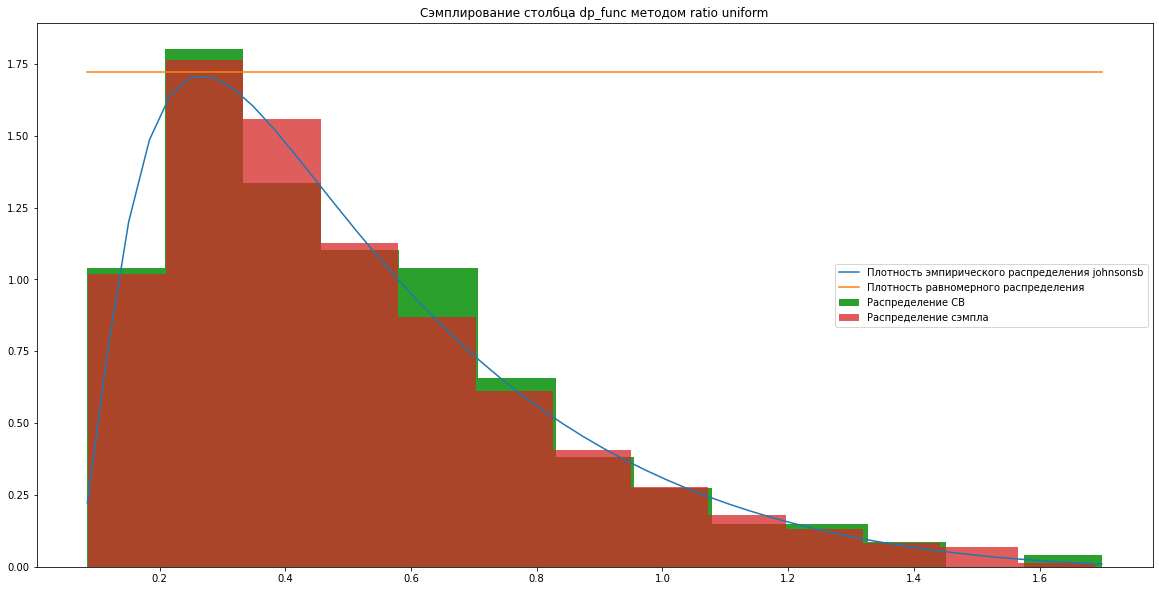

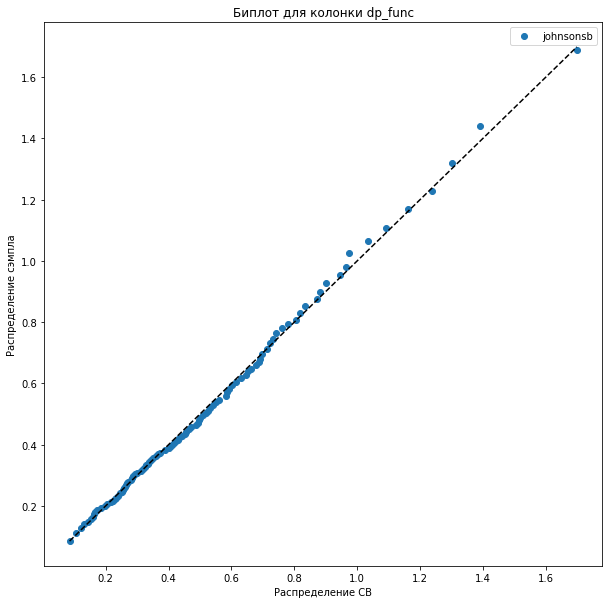

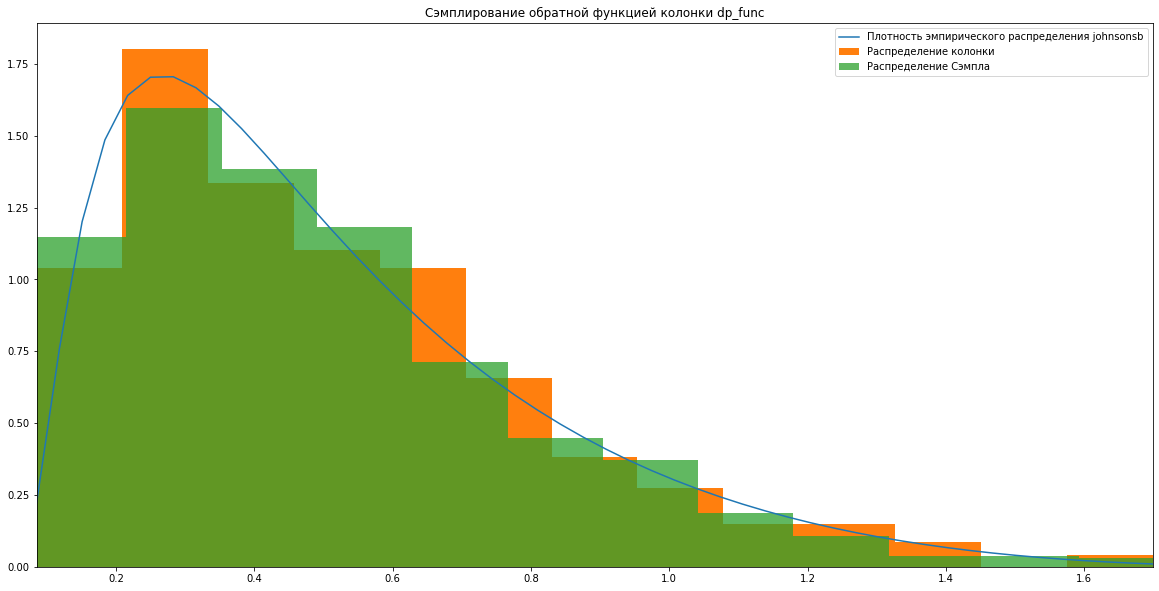

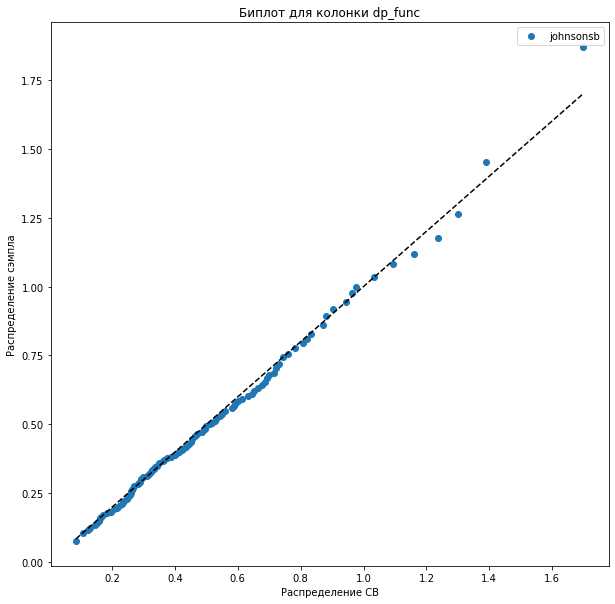

In [97]:
rejection_sampl(df, 'dp_func', 'johnsonsb', dp, 13)
sampl(df, 'dp_func', 'johnsonsb', dp, 13)